In [53]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
dataset = pd.read_csv("/content/dataset.csv") 

In [59]:
dataset.head(10)

,title,paragraph,क्रिडा,क्रिकेट,आयपीएल,टी-20,फुटबॉल,कबड्डी,गुन्हा,खून,...,पावसाळी,उन्हाळा,हिवाळा,मनोरंजन,मराठी सिनेमा\n,बॉलीवूड,हॉलीवूड,सेलिब्रिटी\r,टेलिव्हिजन,चित्रपट
0,भारतीय गोलंदाजांनी इंग्लंडला शरणागती पत्करण्या...,प्रत्युत्तरात पुन्हा एकदा भुवनेश्वर कुमारने (...,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"टीम इंडियाची गाडी घसरली, ३४ वर्षीय गोलंदाजांनी...",रोहित शर्मा व रिषभ यांनी पॉवर प्लेमध्ये क्षेत...,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,टीम इंडियात 'होलसेल' बदल; रोहित शर्माही विसरला...,इंग्लंडविरुद्धच्या दुसऱ्या टी-२० सामन्यात भार...,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,विराट कोहली ५ महिन्यानंतर आला अन् १ धाव करून ब...,रोहित शर्मा व रिषभ पंत या जोडीने भारताला दमदा...,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"""याला टक्कर मारू का?""; रिषभ पंतने Live Match म...","दरम्यान, रोहित व रिषभ फलंदाजी करतानाचा एक व्ह...",1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,विराट कोहली- रोहित शर्मा ओपनिंग करणार; टीम इंड...,पहिल्या सामन्यातील दणदणीत विजयानंतर भारतीय सं...,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,"टीम इंडियाची गाडी घसरली, ३४ वर्षीय गोलंदाजांनी...",नोव्हेंबर २०२१मध्ये आंतरराष्ट्रीय क्रिकेटमधून...,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,"कहानी मे ट्विस्ट!, रोहित शर्मासोबत ओपनिंगला वि...","विराट कोहली, जसप्रीत बुमराह, रिषभ पंत व रवीं...",1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,भारतीय गोलंदाजांनी इंग्लंडला शरणागती पत्करण्या...,भुवनेश्वर कुमारने ( Bhuvneshwar Kumar) पुन्ह...,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,रवींद्र जडेजाने चेन्नई सुपर किंग्सच्या सर्व पो...,इंडियन प्रीमिअर लीग २०२२च्या मध्यंतरानंतर रवी...,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
print("Number of rows in data =",dataset.shape[0])
print("Number of columns in data =",dataset.shape[1])

Number of rows in data = 607
Number of columns in data = 32


In [61]:
missing_values_check = dataset.isnull().sum()
print(missing_values_check)

title                          0
paragraph                      0
क्रिडा                         0
क्रिकेट                        0
आयपीएल                         0
टी-20                          0
फुटबॉल                         0
कबड्डी                         0
गुन्हा                         0
खून                            0
दरोडा                          0
सायबर क्राइम                   0
 बलात्कार                      0
राजकारण                        0
भाजपा                          0
शिवसेना                        0
काँग्रेस                       0
जागतिक राजकारण                 0
खून.1                          0
युक्रेन विरुद्ध रशिया युद्ध    0
आंदोलन                         0
हवामान                         0
पावसाळी                        0
उन्हाळा                        0
हिवाळा                         0
मनोरंजन                        0
मराठी सिनेमा\n                 0
बॉलीवूड                        0
हॉलीवूड                        0
सेलिब्रिटी\r                   0
टेलिव्हिजन

In [62]:
rowSums = dataset.iloc[:,2:].sum(axis=1)
clean_comments_count = (rowSums==0).sum(axis=0)

print("Total number of comments = ",len(dataset))
print("Number of clean comments = ",clean_comments_count)
print("Number of comments with labels =",(len(dataset)-clean_comments_count))

Total number of comments =  607
Number of clean comments =  0
Number of comments with labels = 607


In [63]:
categories = list(dataset.columns.values)
categories = categories[2:]
print(categories)

['क्रिडा', 'क्रिकेट', 'आयपीएल', 'टी-20', 'फुटबॉल', 'कबड्डी', 'गुन्हा', 'खून', 'दरोडा', 'सायबर क्राइम', '\xa0बलात्कार', 'राजकारण', 'भाजपा', 'शिवसेना', 'काँग्रेस', 'जागतिक राजकारण', 'खून.1', 'युक्रेन विरुद्ध रशिया युद्ध', 'आंदोलन', 'हवामान', 'पावसाळी', 'उन्हाळा', 'हिवाळा', 'मनोरंजन', 'मराठी सिनेमा\n', 'बॉलीवूड', 'हॉलीवूड', 'सेलिब्रिटी\r', 'टेलिव्हिजन', 'चित्रपट']


In [64]:
counts = []
for category in categories:
    counts.append((category, dataset[category].sum()))
df_stats = pd.DataFrame(counts, columns=['category', 'number of comments'])
df_stats

,category,number of comments
0,क्रिडा,156
1,क्रिकेट,23
2,आयपीएल,14
3,टी-20,9
4,फुटबॉल,33
5,कबड्डी,100
6,गुन्हा,151
7,खून,36
8,दरोडा,35
9,सायबर क्राइम,30


### **Data visualization**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2325 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2381 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2352 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2367 missing from current font.
  font.set_text(s, 0.0, flags=flags)

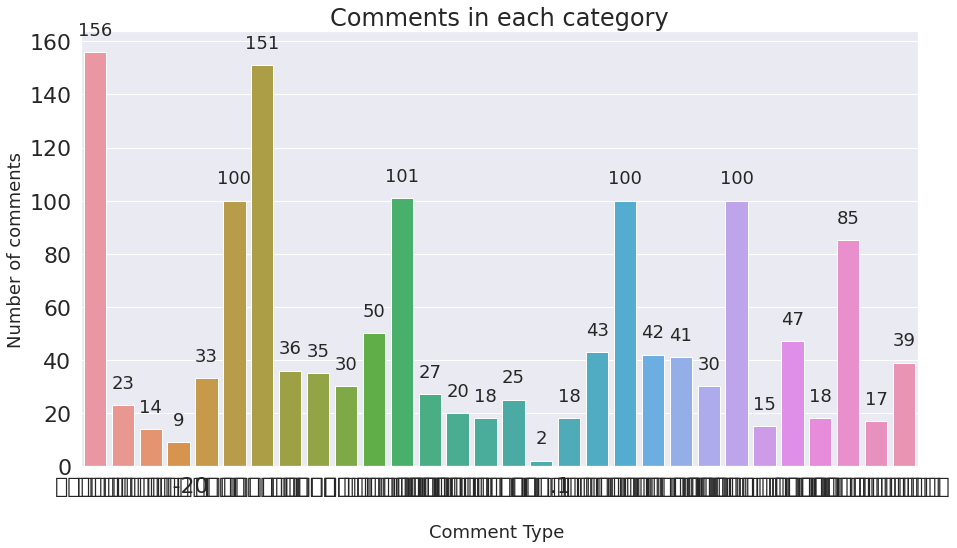

In [65]:
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax= sns.barplot(categories, dataset.iloc[:,2:].sum().values)

plt.title("Comments in each category", fontsize=24)
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Comment Type ', fontsize=18)

#adding the text labels
rects = ax.patches
labels = dataset.iloc[:,2:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)
plt.show()

**Calculating number of comments having multiple labels**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


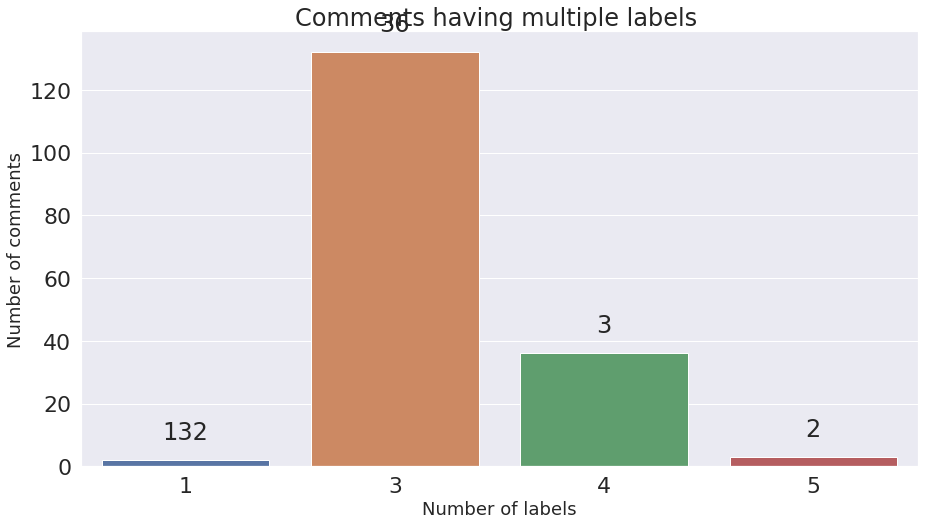

In [66]:
rowSums = dataset.iloc[:,2:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:]

sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)

plt.title("Comments having multiple labels ")
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Number of labels', fontsize=18)

#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [67]:
#Removal of stopwords
def remove_stopwords(test_str):
  file=open('/content/stopwords.txt',encoding='utf8',mode='r')
  stopwords=file.read()
  words=test_str.split()
  length=len(words)
  i=0
  while i < length:
    string=words[i]
    if string in stopwords:
      words.remove(string)
      i=i-1
      length=len(words)
     
    i+=1    
  listToStr = ' '.join(map(str, words))
  return listToStr

In [68]:
dataset.shape

(607, 32)

In [69]:
print("Stopword Removal")
stop_removed=[]
table_list=[]
new_list=[]
new_word=""
table_record=[]
for index, row in dataset.iterrows():
  print(index)
  if index==265:
    break
  text= dataset.loc[index,"paragraph"]
  new_str=remove_stopwords(text)
  stop_removed.append(new_str)
  table_record.append(stop_removed)
  stop= ' '.join(map(str, stop_removed))
  stop_removed=[]

print(table_record)

Stopword Removal
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
[['प्रत्युत्तरात एकदा भुवनेश्

In [70]:
stopword_removed_df = pd.DataFrame(table_record, columns = ['After Stopword Removal'])

In [71]:
stopword_removed_df

,After Stopword Removal
0,प्रत्युत्तरात एकदा भुवनेश्वर कुमारने ( Bhuvnes...
1,रोहित शर्मा रिषभ यांनी पॉवर प्लेमध्ये क्षेत्रर...
2,इंग्लंडविरुद्धच्या दुसऱ्या टी-२० सामन्यात भारत...
3,रोहित शर्मा रिषभ पंत जोडीने भारताला दमदार सुरु...
4,"दरम्यान, रोहित रिषभ फलंदाजी करतानाचा व्हिडीओ स..."
...,...
260,पोलीस उपनिरीक्षकाने नागपुरात राहणाऱ्या अल्पवयी...
261,अल्पवयीन मुलीला पळवून नेत तिच्यावर अत्याचार कर...
262,शिवसेनेचे खासदार राहुल शेवाळे यांनी महिलेविरुद...
263,छत्तीसगढच्या रायपूरमधून अनैतिक संबंधाची धक्काद...


In [72]:
dataset['paragraph'] = stopword_removed_df['After Stopword Removal']

In [73]:
dataset.head(5)


,title,paragraph,क्रिडा,क्रिकेट,आयपीएल,टी-20,फुटबॉल,कबड्डी,गुन्हा,खून,...,पावसाळी,उन्हाळा,हिवाळा,मनोरंजन,मराठी सिनेमा\n,बॉलीवूड,हॉलीवूड,सेलिब्रिटी\r,टेलिव्हिजन,चित्रपट
0,भारतीय गोलंदाजांनी इंग्लंडला शरणागती पत्करण्या...,प्रत्युत्तरात एकदा भुवनेश्वर कुमारने ( Bhuvnes...,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"टीम इंडियाची गाडी घसरली, ३४ वर्षीय गोलंदाजांनी...",रोहित शर्मा रिषभ यांनी पॉवर प्लेमध्ये क्षेत्रर...,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,टीम इंडियात 'होलसेल' बदल; रोहित शर्माही विसरला...,इंग्लंडविरुद्धच्या दुसऱ्या टी-२० सामन्यात भारत...,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,विराट कोहली ५ महिन्यानंतर आला अन् १ धाव करून ब...,रोहित शर्मा रिषभ पंत जोडीने भारताला दमदार सुरु...,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"""याला टक्कर मारू का?""; रिषभ पंतने Live Match म...","दरम्यान, रोहित रिषभ फलंदाजी करतानाचा व्हिडीओ स...",1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
#Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer  
tfidfconverter = TfidfVectorizer(max_features=2000, min_df=5, max_df=0.7)
x = tfidfconverter.fit_transform(dataset['paragraph'].values.astype('str'))
print(type(x))

<class 'scipy.sparse.csr.csr_matrix'>


In [75]:
new_data = pd.DataFrame(x.toarray())

In [76]:
new_data

,0,1,2,3,4,5,6,7,8,9,...,418,419,420,421,422,423,424,425,426,427
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.162991,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
603,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
604,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
605,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
new_data['राजकारण'] = dataset['राजकारण']

In [87]:
new_data['भाजपा'] = dataset['भाजपा']
new_data['शिवसेना'] = dataset['शिवसेना']
new_data['काँग्रेस'] = dataset['काँग्रेस']
new_data['जागतिक राजकारण'] = dataset['जागतिक राजकारण']
new_data['खून'] = dataset['खून']
new_data['युक्रेन विरुद्ध रशिया युद्ध'] = dataset['युक्रेन विरुद्ध रशिया युद्ध']
new_data['आंदोलन'] = dataset['आंदोलन']
new_data['हवामान'] = dataset['हवामान']
new_data['पावसाळी'] = dataset['पावसाळी']
new_data['उन्हाळा'] = dataset['उन्हाळा']
new_data['हिवाळा'] = dataset['हिवाळा']
new_data['क्रिडा'] = dataset['क्रिडा']
new_data['क्रिकेट'] = dataset['क्रिकेट']
new_data['आयपीएल'] = dataset['आयपीएल']
new_data['टी-20'] = dataset['टी-20']
new_data['फुटबॉल'] = dataset['फुटबॉल']
new_data['कबड्डी'] = dataset['कबड्डी']
new_data['गुन्हा'] = dataset['गुन्हा']
new_data['दरोडा'] = dataset['दरोडा']
new_data['सायबर क्राइम'] = dataset['सायबर क्राइम']

In [88]:
new_data['\xa0बलात्कार'] = dataset['\xa0बलात्कार']

In [89]:
new_data['खून.1'] = dataset['खून.1']

In [90]:
new_data['मनोरंजन'] = dataset['मनोरंजन']
new_data['मराठी सिनेमा\n'] = dataset['मराठी सिनेमा\n']
new_data['बॉलीवूड'] = dataset['बॉलीवूड']
new_data['हॉलीवूड'] = dataset['हॉलीवूड']
new_data['सेलिब्रिटी\r'] = dataset['सेलिब्रिटी\r']
new_data['टेलिव्हिजन'] = dataset['टेलिव्हिजन']
new_data['चित्रपट'] = dataset['चित्रपट']

In [82]:
new_data

,0,1,2,3,4,5,6,7,8,9,...,सायबर क्राइम,बलात्कार,खून.1,मनोरंजन,मराठी सिनेमा\n,बॉलीवूड,हॉलीवूड,सेलिब्रिटी\r,टेलिव्हिजन,चित्रपट
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,1,1,0,1
603,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,1,1,0,0
604,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,1,0,0,0,0,1
605,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,1,0,1,0,0


In [91]:
counts = []
for category in categories:
    counts.append((category, dataset[category].sum()))
df_stats = pd.DataFrame(counts, columns=['category', 'number of comments'])
df_stats

,category,number of comments
0,क्रिडा,156
1,क्रिकेट,23
2,आयपीएल,14
3,टी-20,9
4,फुटबॉल,33
5,कबड्डी,100
6,गुन्हा,151
7,खून,36
8,दरोडा,35
9,सायबर क्राइम,30


In [92]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(new_data, random_state=42, test_size=0.30, shuffle=True)

print(train.shape)
print(test.shape)

(424, 458)
(183, 458)


In [93]:
train_text = train.drop(labels=['क्रिडा', 'क्रिकेट', 'आयपीएल', 'टी-20', 'फुटबॉल', 'कबड्डी', 'गुन्हा', 'खून', 'दरोडा', 'सायबर क्राइम', '\xa0बलात्कार', 'राजकारण', 'भाजपा', 'शिवसेना', 'काँग्रेस', 'जागतिक राजकारण', 'खून.1', 'युक्रेन विरुद्ध रशिया युद्ध', 'आंदोलन', 'हवामान', 'पावसाळी', 'उन्हाळा', 'हिवाळा', 'मनोरंजन', 'मराठी सिनेमा\n', 'बॉलीवूड', 'हॉलीवूड', 'सेलिब्रिटी\r', 'टेलिव्हिजन', 'चित्रपट'], axis=1)
test_text = test.drop(labels=['क्रिडा', 'क्रिकेट', 'आयपीएल', 'टी-20', 'फुटबॉल', 'कबड्डी', 'गुन्हा', 'खून', 'दरोडा', 'सायबर क्राइम', '\xa0बलात्कार', 'राजकारण', 'भाजपा', 'शिवसेना', 'काँग्रेस', 'जागतिक राजकारण', 'खून.1', 'युक्रेन विरुद्ध रशिया युद्ध', 'आंदोलन', 'हवामान', 'पावसाळी', 'उन्हाळा', 'हिवाळा', 'मनोरंजन', 'मराठी सिनेमा\n', 'बॉलीवूड', 'हॉलीवूड', 'सेलिब्रिटी\r', 'टेलिव्हिजन', 'चित्रपट'], axis=1)

In [94]:
x_train = train_text
y_train = train[['क्रिडा', 'क्रिकेट', 'आयपीएल', 'टी-20', 'फुटबॉल', 'कबड्डी', 'गुन्हा', 'खून', 'दरोडा', 'सायबर क्राइम', '\xa0बलात्कार', 'राजकारण', 'भाजपा', 'शिवसेना', 'काँग्रेस', 'जागतिक राजकारण', 'खून.1', 'युक्रेन विरुद्ध रशिया युद्ध', 'आंदोलन', 'हवामान', 'पावसाळी', 'उन्हाळा', 'हिवाळा', 'मनोरंजन', 'मराठी सिनेमा\n', 'बॉलीवूड', 'हॉलीवूड', 'सेलिब्रिटी\r', 'टेलिव्हिजन', 'चित्रपट']]

x_test = test_text
y_test = test[['क्रिडा', 'क्रिकेट', 'आयपीएल', 'टी-20', 'फुटबॉल', 'कबड्डी', 'गुन्हा', 'खून', 'दरोडा', 'सायबर क्राइम', '\xa0बलात्कार', 'राजकारण', 'भाजपा', 'शिवसेना', 'काँग्रेस', 'जागतिक राजकारण', 'खून.1', 'युक्रेन विरुद्ध रशिया युद्ध', 'आंदोलन', 'हवामान', 'पावसाळी', 'उन्हाळा', 'हिवाळा', 'मनोरंजन', 'मराठी सिनेमा\n', 'बॉलीवूड', 'हॉलीवूड', 'सेलिब्रिटी\r', 'टेलिव्हिजन', 'चित्रपट']]

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier

In [96]:
%%time

# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
            ])

for category in categories:
    print('*Processing {} comments...*'.format(category))
    
    # Training logistic regression model on train data
    LogReg_pipeline.fit(x_train, train[category])
    
    # calculating test accuracy
    prediction = LogReg_pipeline.predict(x_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    print("\n")

*Processing क्रिडा comments...*
Test accuracy is 0.9890710382513661


*Processing क्रिकेट comments...*
Test accuracy is 0.9508196721311475


*Processing आयपीएल comments...*
Test accuracy is 0.9672131147540983


*Processing टी-20 comments...*
Test accuracy is 0.9836065573770492


*Processing फुटबॉल comments...*
Test accuracy is 0.9453551912568307


*Processing कबड्डी comments...*
Test accuracy is 0.9398907103825137


*Processing गुन्हा comments...*
Test accuracy is 0.9016393442622951


*Processing खून comments...*
Test accuracy is 0.9508196721311475


*Processing दरोडा comments...*
Test accuracy is 0.9508196721311475


*Processing सायबर क्राइम comments...*
Test accuracy is 0.9508196721311475


*Processing  बलात्कार comments...*
Test accuracy is 0.8961748633879781


*Processing राजकारण comments...*
Test accuracy is 0.8852459016393442


*Processing भाजपा comments...*
Test accuracy is 0.9617486338797814


*Processing शिवसेना comments...*
Test accuracy is 0.9781420765027322


*Processing का

In [32]:
!pip install scikit-multilearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 89 kB 2.8 MB/s 


### **Multiple Binary Classifications - (Binary Relevance)**

In [97]:
%%time

# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(GaussianNB())

# train
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

Accuracy =  0.1912568306010929


CPU times: user 275 ms, sys: 3.61 ms, total: 278 ms
Wall time: 280 ms


### **Classifier Chains**

In [98]:
# using classifier chains
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression



In [99]:
%%time

# initialize classifier chains multi-label classifier
classifier = ClassifierChain(LogisticRegression())

# Training logistic regression model on train data
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

Accuracy =  0.3333333333333333


CPU times: user 670 ms, sys: 457 ms, total: 1.13 s
Wall time: 592 ms


### **Label Powerset**

In [100]:
# using Label Powerset
from skmultilearn.problem_transform import LabelPowerset

In [101]:
%%time

# initialize label powerset multi-label classifier
classifier = LabelPowerset(LogisticRegression())

# train
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

Accuracy =  0.4371584699453552


CPU times: user 566 ms, sys: 280 ms, total: 846 ms
Wall time: 454 ms
